In [1]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string

# VEST OH 2016
---

## VEST Documentation

### Election Results

#### Sources
Election results from the Ohio Secretary of State (https://www.sos.state.oh.us/elections/election-results-and-data/). 

#### Processing Part 1
The following counties include adjustments to account for corporate annexations that are not specified below by precinct: Adams, Allen, Athens, Auglaize, Brown, Butler, Defiance, Franklin, Fulton, Geauga, Guernsey, Holmes, Licking, Lorain, Madison, Marion, Miami, Ottawa, Pickaway, Sandusky, Shelby, Stark, Tuscarawas, Van Wert, Warren, Wayne, Wyandot.

#### Processing Part 2 (unclear whether this is for election results, shapefiles, or both)
The following additional revisions were made to match the 2016 precinct boundaries:

- **Adams:** Split Liberty N/S, Peebles E/W
- **Ashland:** Split Ashland City 1-B/C, 2-B/C, 4-C/D, Clear Creek 1/2, Hanover/Loundonville 2, Vermilion 2/3
- **Athens:** Adjust Athens 4-4/4-5, Nelsonville 1/2/3/4
- **Brown:** Adjust Perry Twp South/Villages
- **Butler:** Adjust Hamilton 22/24, Oxford 6/11, Trenton 5/7, West Chester 28/39
- **Champaign:** Adjust Union N/S
- **Clark:** Align New Carlisle, Springfield precincts with county maps
- **Clermont:** Reverse unincorporation of Amelia and Newtonsville
- **Clinton:** Merge Wilmington 3-B/C
- **Columbiana:** Split E Liverpool 4-A/B, St Clair Glenmoor/SW
- **Coshocton:** Split Coshocton 3-B/C, 4-B/C
- **Crawford:** Split Holmes/Texas, Sandusky/Whetstone North; Move eastern Polk Twp from Galion 1B to western Polk Twp
- **Cuyahoga:** Adjust Olmsted Twp D/F/H; Realign Westlake wards
- **Defiance:** Merge N/S Richland; Split Tiffin A/B
- **Delaware:** Merge Berkshire B/D/E, Berlin B/F, Concord F/J, Columbus D/G, Delaware 3-F/H, 4-E/G, Genoa H/T, Liberty N into B/C, Orange D/T, G/U, Powell K into G/I, Westerville A/I; Adjust Berkshire A/C/B, Berlin A/C, Columbus A/D, B/D, C/E, Delaware 3-A/2-D, 2-D/Twp A, 3-C/3-E/Twp B, Genoa N/Q, Liberty A/Powell J, Liberty G/K, Orange B/E, H/O, Powell E/F
- **Fairfield:** Realign precincts in Columbus City, Lancaster Ward 1, Ward 2, Ward 6; Merge Pickerington K/O, Pickerington N into F/L; Adjust Bloom A/B, Lancaster 4-B/C, Pickerington J/K, Violet B/C, I/J
- **Fulton:** Split Amboy/Metamora, Fayette/Gorham, Lyons/Royalton, Swancreek West 1/2, Swanton 1/2, 3/4, York N/S
- **Franklin:** Merge Dub 1-I into Dub 1-A/F, Cols 05-B/D, 08-A/H, 08-B/G, 12-D/E, 14-D/G, 16-C/F, 30-A/E, 33-C/J, 33-F/I, 41-D/H/I, 42-A/E, 43-A/E, 44-E/H, 45-C/N, 45-H/M, 45-K/O, 46-E/L, 46-G/M, 50-D/E, 52-C/H, 52-F/G, 57-F/G, 58-A/K, 59-C/F, 64-C/G, 64-D/H, 68-A/D, 69-C/N, 73-G/L, 73-H/K, 73-J/M, 74-E/H, 75-D/H, 75-E/I, 78-C/I, 79-D/E, 82-F/N, 82-G/M, 82-I/O, 83-B/H, 83-C/J, 83-F/I, 84-D/H, 85-D/E, 86-F/I, 86-G/J, Grove City 1-E/G, 2-E/G, Groveport A/E, Hill 1-D/G, 2-C/F, 4-D/E, Jefferson D/I, E/J, F/H, New Albany F/G, Reyns 2-A/G, 4-B/G, Westerville 3-A/E, Worth 3-A/D, 3-B/C
- **Gallia:** Merge Addison Pct/Twp
- **Greene:** Adjust Bath 277/Fairborn 226/Xenia 351
- **Hamilton:** Merge Blue Ash 4-A/B, Norwood 1-A/C, Cincinnati 6-E into 6-A/B, 11-D into 11-A/B/C, 12-A/D, 12-C/E, 13-B/H; Adjust Blue Ash 1-B/2-A/3-B/4-A, Cincinnati 12-B/C, 23-A/D, 23-I/P, 25-F/K, Cleves A/Whitewater A, Colerain BB/F/H, Delhi A/B, Loveland D/Symmes C/K, Miami B/D/G, Whitewater A/C; Realign Cincinnati/Green B
- **Hocking:** Split Falls 1/4, 3/5, Falls 3/West Logan, Hide Away Hills/Marion 1, Laurelville/Perry 1
- **Knox:** Merge Brinkhaven/Union, Gambier A/C; Adjust Clinton A/Mount Vernon 1-B, Clinton B/Mount Vernon 2-A
- **Lake:** Merge Concord B/O, Mentor City 2G/2I, Painesville City 4A/4D, Painesville Twp L into A/K; Adjust Concord A/I, Painesville City 2-A/B, Painesville Twp C/E, Willoughby Hills CC/DD
- **Logan:** Split Second Ward A/C, B/D
- **Lorain:** Merge Avon Lake City 4-A/D, N. Ridgeville 3-A/F/H, N. Ridgeville 1-E into 1-B/D, 3-G into 3-C/D; Adjust Avon Lake City 2-B/C, 4-A/B/C, N. Ridgeville 3-A/B
- **Lucas:** Realign wards in Jerusalem, Maumee, Monclova, Oregon, Ottawa Hills, Spencer, Springfield, Sylvania City, Sylvania Twp, Washington
- **Madison:** Split Monroe/Pike, Paint/Midway-Range/S Solon-Stokes
- **Medina:** Merge Brunswick City 1-F into 1-C/D, York Twp C into A/B, Montville Twp H into A/B, Montville Twp I into A/C/E; Adjust Brunswick City 1-A/B, Wadsworth City 1-D/Sharon D, Wadsworth City 2-D/Twp C
- **Pickaway:** Merge Commercial Point East/West; Add Circleville 1-D; Align Circleville wards with city map
- **Portage:** Split Brady Lake Vlg/Franklin D
- **Putnam:** Merge Glandorf/Ottawa Twp West
- **Richland:** Split Mansfield Ward 6 Prec B/C, Worthington B/C; Adjust Ontario 3/4
- **Stark:** Split Alliance 3-A/C, Canton 2-D/F, 2-E/G, 4-D/E, Massillon 4-A/B, 5-B/D, 7-B/D, 7-H/I, Lake 10/12, Paris A/B, Plain 7/13, Plain 22/23, Sugarcreek 1/D; Merge Jackson 33 into 17/23/30, Lake B into Lake A/15, Lawrence 6 into Lawrence 1/3; Adjust Coventry D/G, Hudson 1-B/3-C, Jackson 6/22, N. Canton 2-A/B, Perry 4/16, Plain 8/29/30
- **Summit:** Adjust Coventry D/G, Fairlawn 2-A/4-A, Hudson 1-B/3-C, Springfield F/J; Realign Twinsburg wards
- **Union:** Merge Jerome 3/6, Marysville 1/2, Marysville 4 into 3/11, Marysville 15 into 4/9
- **Warren:** Split Springboro City 4-B/D, Deerfield W from Deerfield AA/X, Mason City U from Mason City N/T; Merge Clearcreek B/N, Hamilton A/U, D/T, Turtlecreek L into Turtlecreek A/F, Mason City Z into Mason City F/Deerfield E/Union A; Adjust Carlisle 2-A/3-A, South Lebanon A/B, C/D, Springboro 1-B/C, Turtlecreek F/K
- **Wood:** Replace Bloom, Milton, Montgomery, Perry, Portage precincts with 2019 VTDs
- **Wyandot:** Split Sycamore Twp/Village

#### Races

G16PRERTRU - Donald J. Trump (Republican Party)  
G16PREDCLI - Hillary Clinton (Democratic Party)  
G16PRELJOH - Gary Johnson (Independent)  
G16PREGSTE - Jill Stein (Green Party)  
G16PREIDUN - Richard Duncan (Independent)  

G16USSRPOR - Rob Portman (Republican Party)  
G16USSDSTR - Ted Strickland (Democratic Party)  
G16USSGDEM - Joseph R. DeMare (Green Party)  
G16USSICON - Tom Connors (Independent)  
G16USSIRUP - Scott Rupert (Independent)  

### Shapefiles

#### Sources
Precinct shapefile from the U.S. Census Bureau's 2020 Redistricting Data Program final release. Note that some VTDs were relabeled to match precinct names and/or precinct codes in the November 2016 general election returns.

# Election Result Processing

## Get VEST file and FIPS dictionary ready

### Load in VEST file

In [2]:
vest_oh_16 = gp.read_file("./raw-from-source/VEST/oh_2016/oh_2016.shp")

In [3]:
vest_oh_16.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<AxesSubplot:>

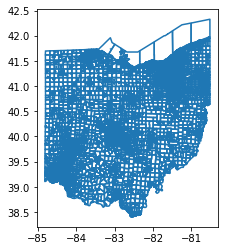

In [4]:
vest_oh_16.boundary.plot()

In [5]:
vest_oh_16.columns

Index(['STATEFP16', 'COUNTYFP16', 'VTDST16', 'PRECINCT16', 'GEOID16', 'NAME16',
       'G16PRERTRU', 'G16PREDCLI', 'G16PRELJOH', 'G16PREGSTE', 'G16PREIDUN',
       'G16USSRPOR', 'G16USSDSTR', 'G16USSGDEM', 'G16USSICON', 'G16USSIRUP',
       'geometry'],
      dtype='object')

### Create a FIPs dictionary for OH

In [6]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Ohio"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
oh_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

## Load and Clean Election Results

### Load Election Results

Cleaned the `precincts.xlsx` file by hand, and created `sos_precinct_results_clean.csv`. No modifications were made to the election results. The President and U.S. Senate results were merged into one sheet tab, and election columns were renamed to match VEST's. 

In [7]:
#Load in clean SOS file
elections_2016 = pd.read_csv("./raw-from-source/SOS/sos_precinct_results_clean.csv")

In [8]:
elections_2016.shape

(8887, 13)

In [9]:
elections_2016.head()

,County Name,Precinct Name,Precinct Code,G16PREDCLI,G16PREIDUN,G16PRELJOH,G16PREGSTE,G16PRERTRU,G16USSICON,G16USSGDEM,G16USSRPOR,G16USSIRUP,G16USSDSTR
0,Adams,BRATTON TOWNSHIP,AAA,96,4,12,4,532,6,6,532,10,80
1,Adams,BRUSH CREEK TOWNSHIP,AAB,95,5,9,0,390,16,6,358,6,93
2,Adams,LOCUST GROVE,AAD,94,2,5,4,408,12,5,393,9,85
3,Adams,GREEN TOWNSHIP,AAE,76,2,2,1,176,2,4,169,1,69
4,Adams,JEFFERSON TOWNSHIP,AAG,73,1,8,2,258,5,9,239,2,86


In [10]:
#Map to the correct FIP
elections_2016["county"]=elections_2016["County Name"].map(oh_fips_dict).fillna(elections_2016["County Name"])

#Print out the FIPS to make sure they all are in the correct format
elections_2016["county"].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '083', '085', '087', '089',
       '091', '093', '095', '097', '099', '101', '103', '105', '107',
       '109', '111', '113', '115', '117', '119', '121', '123', '125',
       '127', '129', '131', '133', '135', '137', '139', '141', '143',
       '145', '147', '149', '151', '153', '155', '157', '159', '161',
       '163', '165', '167', '169', '171', '173', '175'], dtype=object)

## Compare Election Results Totals

### Compare Total Votes

In [11]:
races = [x for x in vest_oh_16.columns if 'G16' in x]
races

['G16PRERTRU',
 'G16PREDCLI',
 'G16PRELJOH',
 'G16PREGSTE',
 'G16PREIDUN',
 'G16USSRPOR',
 'G16USSDSTR',
 'G16USSGDEM',
 'G16USSICON',
 'G16USSIRUP']

In [12]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_oh_16[i])
    sum_var_2 += np.sum(elections_2016[i])
print(sum_var_1)
print(sum_var_2)

10854226
10854226


### Compare Race Totals

In [13]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [14]:
statewide_totals_check(vest_oh_16,elections_2016,races)

***Statewide Totals Check***
G16PRERTRU is equal 	VEST / RDH: 2841005
G16PREDCLI is equal 	VEST / RDH: 2394164
G16PRELJOH is equal 	VEST / RDH: 174498
G16PREGSTE is equal 	VEST / RDH: 46271
G16PREIDUN is equal 	VEST / RDH: 24235
G16USSRPOR is equal 	VEST / RDH: 3118567
G16USSDSTR is equal 	VEST / RDH: 1996908
G16USSGDEM is equal 	VEST / RDH: 88246
G16USSICON is equal 	VEST / RDH: 93041
G16USSIRUP is equal 	VEST / RDH: 77291


### County Totals

In [15]:
#Have a matching county column
elections_2016["COUNTYFP16"] = elections_2016["county"]

In [16]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [17]:
elections_2016.groupby(["COUNTYFP16"]).sum().to_csv("./county_totals.csv")

In [18]:
county_totals_check(vest_oh_16,elections_2016,races,"COUNTYFP16",full_print=False)

***Countywide Totals Check***

G16PRERTRU is equal across all counties
G16PREDCLI is equal across all counties
G16PRELJOH is equal across all counties
G16PREGSTE is equal across all counties
G16PREIDUN is equal across all counties
G16USSRPOR is equal across all counties
G16USSDSTR is equal across all counties
G16USSGDEM is equal across all counties
G16USSICON is equal across all counties
G16USSIRUP is equal across all counties


### Compare Precinct Totals

In [19]:
#Create a unique_ID for both
elections_2016["unique_ID"] = elections_2016["county"]+"-"+elections_2016["Precinct Code"]
vest_oh_16["unique_ID"] = vest_oh_16["COUNTYFP16"]+"-"+vest_oh_16["PRECINCT16"]

In [20]:
#Confirm that it is in fact unique
print(elections_2016["unique_ID"].value_counts(dropna=False))
print(vest_oh_16["unique_ID"].value_counts(dropna=False))

095-AIM    1
007-ABF    1
099-AJW    1
097-AAP    1
055-ABW    1
          ..
099-AHZ    1
061-AOQ    1
035-AQO    1
101-ACX    1
043-ACL    1
Name: unique_ID, Length: 8887, dtype: int64
095-AIM    1
055-ABW    1
105-AAX    1
151-AIL    1
153-AAF    1
          ..
171-AAR    1
099-AHZ    1
035-BDS    1
049-BAH    1
043-ACL    1
Name: unique_ID, Length: 8895, dtype: int64


In [21]:
#Join
attempt_one = pd.merge(elections_2016,vest_oh_16,how="outer",on="unique_ID",indicator=True)
print(attempt_one["_merge"].value_counts())

elections_only = attempt_one[attempt_one["_merge"]=="left_only"]
vest_only = attempt_one[attempt_one["_merge"]=="right_only"]

both          8887
right_only       8
left_only        0
Name: _merge, dtype: int64


In [22]:
#All the unjoined precincts have 0 total votes
races_x =["unique_ID"]
races_y =["unique_ID"]

for val in races:
    races_x.append(val+"_x")
    races_y.append(val+"_y")

display(elections_only[races_x])
display(vest_only[races_y])

,unique_ID,G16PRERTRU_x,G16PREDCLI_x,G16PRELJOH_x,G16PREGSTE_x,G16PREIDUN_x,G16USSRPOR_x,G16USSDSTR_x,G16USSGDEM_x,G16USSICON_x,G16USSIRUP_x


,unique_ID,G16PRERTRU_y,G16PREDCLI_y,G16PRELJOH_y,G16PREGSTE_y,G16PREIDUN_y,G16USSRPOR_y,G16USSDSTR_y,G16USSGDEM_y,G16USSICON_y,G16USSIRUP_y
8887,093-ZZZ,0,0,0,0,0,0,0,0,0,0
8888,123-ZZZ,0,0,0,0,0,0,0,0,0,0
8889,095-ZZZ,0,0,0,0,0,0,0,0,0,0
8890,043-ZZZ,0,0,0,0,0,0,0,0,0,0
8891,085-ZZZ,0,0,0,0,0,0,0,0,0,0
8892,035-ZZZ,0,0,0,0,0,0,0,0,0,0
8893,133-ZZZ,0,0,0,0,0,0,0,0,0,0
8894,007-ZZZ,0,0,0,0,0,0,0,0,0,0


In [23]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [24]:
precinct_votes_check(attempt_one[attempt_one["_merge"]=="both"],races,False,"unique_ID",print_level=0)


There are  8887  total rows
0  of these rows have election result differences
8887  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
[]


# Precinct Shapefile

## Load in the shapefiles

### 2020 TIGER/Line

> Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program final release

Link to the 2020 TIGER/Line files for Ohio, where we can download the VTD file: 
https://www2.census.gov/geo/tiger/TIGER2020PL/STATE/39_OHIO/39/

In [25]:
tiger_vtd = gp.read_file('./raw-from-source/Census/tl_2020_39_vtd20/tl_2020_39_vtd20.shp')

<AxesSubplot:>

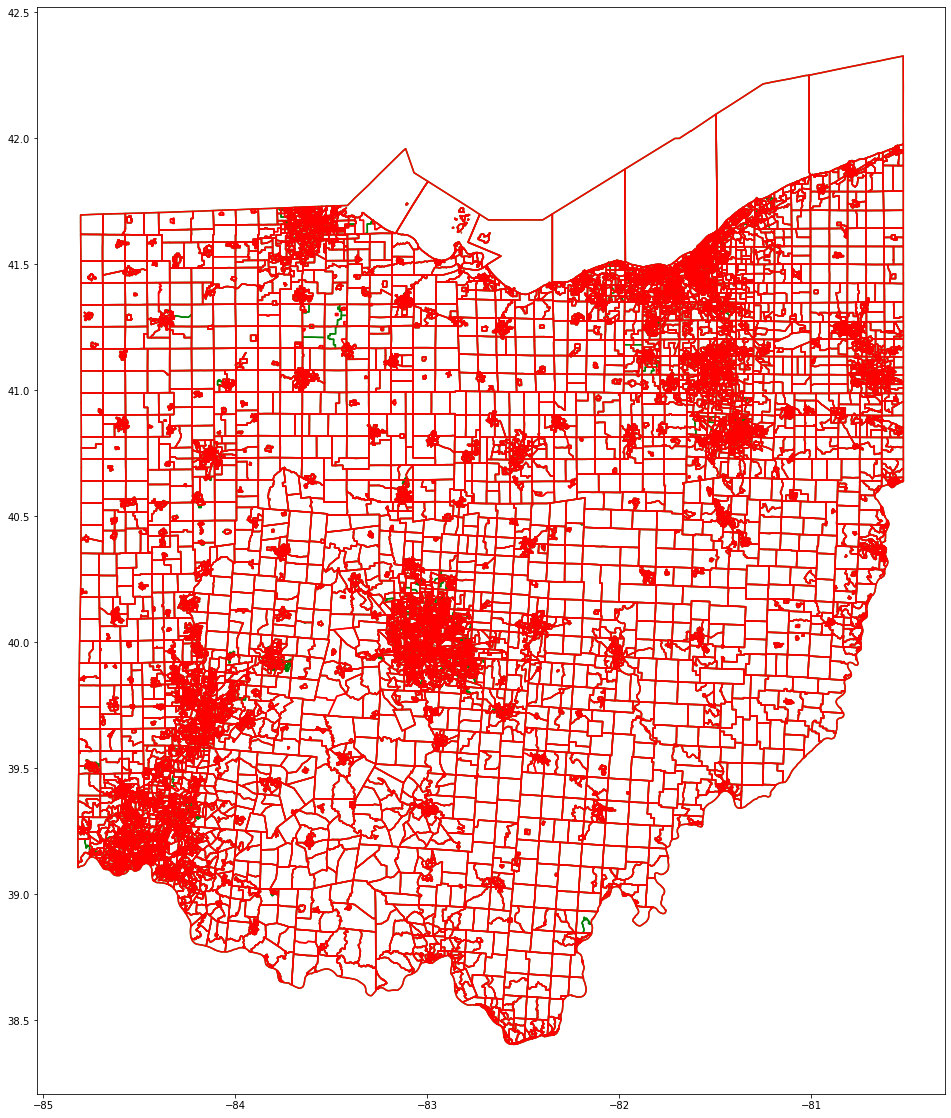

In [26]:
#Plot what they look like on top of one another, looks similar to what VEST has
ax = tiger_vtd.boundary.plot(figsize=(20,20),color="green")
vest_oh_16.boundary.plot(figsize=(20,20),ax=ax,color="red")

With a cursory look, this looks correct. 

### Join to election results

In [27]:
#Create a unique ID
tiger_vtd["unique_ID"] = tiger_vtd["COUNTYFP20"]+"-"+tiger_vtd["VTDST20"].str[3:6]
final_source = pd.merge(elections_2016,tiger_vtd,how="outer",on="unique_ID",indicator=True)

print(tiger_vtd["unique_ID"].value_counts())
print(final_source["_merge"].value_counts())

final_source[final_source["_merge"]=="left_only"].to_csv("./elections.csv")
final_source[final_source["_merge"]=="right_only"].to_csv("./census.csv")

129-AAC    1
105-AAX    1
019-ABG    1
041-AAQ    1
099-AOF    1
          ..
035-BPN    1
035-DCM    1
089-ACV    1
089-AFS    1
043-ACL    1
Name: unique_ID, Length: 8941, dtype: int64
both          8808
right_only     133
left_only       79
Name: _merge, dtype: int64


In [28]:
pd.options.display.max_rows = 999
display(final_source[final_source["_merge"]=="left_only"][["County Name","Precinct Name"]])

,County Name,Precinct Name
9,Adams,PEEBLES WEST
22,Adams,LIBERTY NORTH
113,Ashland,ASHLAND CITY 1-C
118,Ashland,ASHLAND CITY 2-C
127,Ashland,ASHLAND CITY 4-D
133,Ashland,LOUDONVILLE 2
153,Ashland,VERMILLION 3
155,Ashland,CLEAR CREEK 2
1016,Clermont,NEWTONSVILLE VILLAGE
1089,Columbiana,PRECINCT E LIVERPOOL 4-B


### Add in the 8 zero-vote precincts (these also appeared in VEST's file)

In [29]:
zero_votes= pd.DataFrame(columns=elections_2016.columns)
zero_votes["County Name"]=['Lorain','Ottawa','Lucas','Erie','Lake','Cuyahoga','Portage','Ashtabula']
zero_votes["Precinct Name"] = ["Voting District Not Defined"] * 8
zero_votes["Precinct Code"] = ["ZZZ"] * 8
for val in races:
    zero_votes[val] = [0] * 8
zero_votes["county"] = ["093","123","095","043","085","035","133","007"]
zero_votes["unique_ID"] = zero_votes["county"]+"-"+zero_votes["Precinct Code"]

In [30]:
#Join them
elections_final = pd.concat([elections_2016,zero_votes])
elections_final.reset_index(inplace=True,drop=True)

### Final election results and shapefile join

In [31]:
final_source = pd.merge(elections_final,tiger_vtd,how="outer",on="unique_ID",indicator=True)
final_source["_merge"].value_counts()

both          8816
right_only     125
left_only       79
Name: _merge, dtype: int64

### Join to VEST

In [32]:
final_merge = pd.merge(vest_oh_16,final_source[final_source["_merge"]=="both"],indicator="final_merge",how="outer",on="unique_ID")
final_merge["final_merge"].value_counts()

both          8816
left_only       79
right_only       0
Name: final_merge, dtype: int64

In [33]:
#Create a column for printing in the below code
final_merge["shape_print"]=final_merge["County Name"]+"-"+final_merge["Precinct Name"]

final_merge.sort_values(["shape_print"],inplace=True)

In [34]:
both = final_merge[final_merge["_merge"]=="both"]
source_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=vest_oh_16.crs)
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=vest_oh_16.crs)
source_geoms = source_geoms.to_crs(epsg=3857)
vest_geoms = vest_geoms.to_crs(epsg=3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     8027
False     789
dtype: int64


In [ ]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .1):
        count += 1
        name = source_geoms.iat[i,50]
        
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

1) For Adams-LIBERTY SOUTH difference in area is 8.275160868132577
2) For Adams-PEEBLES EAST difference in area is 0.2981243558031175
3) For Ashland-ASHLAND CITY 1-B difference in area is 0.2585960132273064
4) For Ashland-ASHLAND CITY 2-B difference in area is 0.2840260217294664
5) For Ashland-ASHLAND CITY 4-C difference in area is 0.6364807544919947
6) For Ashland-CLEAR CREEK 1 difference in area is 6.494854830463903
7) For Ashland-HANOVER difference in area is 0.4662033538286736
8) For Ashland-VERMILLION 2 difference in area is 5.117897689924978
9) For Brown-SARDINIA VILLAGE difference in area is 0.2217760416826679
10) For Brown-WASHINGTON TWP difference in area is 0.2217760416826679
11) For Butler-OXFORD 12 difference in area is 0.21281941929251635
12) For Butler-OXFORD 3 difference in area is 0.10061173866921652
13) For Butler-OXFORD TWP 1 difference in area is 0.10061173866921655
14) For Butler-OXFORD TWP 3 difference in area is 0.33052006003650497
15) For Clark-PRECINCT CARL 1 di

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


22) For Clark-PRECINCT PIKE 1 difference in area is 0.171150111404867
23) For Clark-PRECINCT T-4 difference in area is 0.22186179752519727
24) For Clark-PRECINCT T-6 difference in area is 0.9777300601274321
25) For Clark-PRECINCT T-7 difference in area is 0.15351384429055281
26) For Clark-PRECINCT T-8 difference in area is 0.1555430334656136
27) For Clermont-AMELIA VILLAGE A difference in area is 0.12202177993630352
28) For Clinton-WILMINGTON 3-B difference in area is 0.16155269979735778
29) For Columbiana-PRECINCT E LIVERPOOL 4-A difference in area is 0.23873440587118705


In [ ]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

In [ ]:
df